One issue with vanilla neural nets (and also CNNs) is that they only work with pre-determined sizes: they take fixed-size inputs and produce fixed-size outputs. RNNs are useful because they let us have variable-length sequences as both inputs and outputs. Here are a few examples of what RNNs can look like:

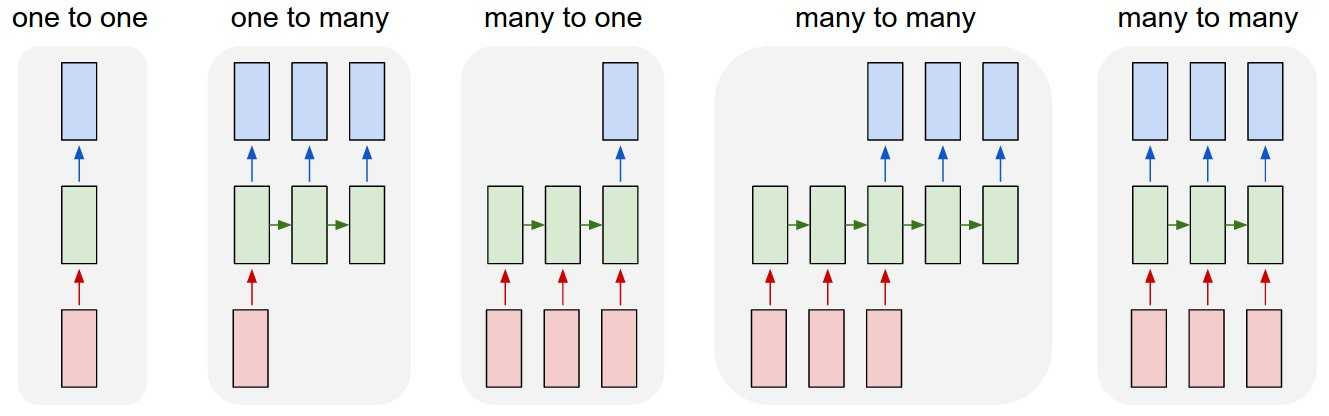

In [1]:
from data import train_data, test_data

# Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)

18 unique words found


In [6]:
# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
print(word_to_idx['good']) # 16 (this may change)
print(idx_to_word[0]) # sad (this may change)

6
at


In [7]:
import numpy as np

def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words
  in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

## The Forward Phase

In [8]:
import numpy as np
from numpy.random import randn

class RNN:
  # A Vanilla Recurrent Neural Network.

  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.Whh = randn(hidden_size, hidden_size) / 1000
    self.Wxh = randn(hidden_size, input_size) / 1000
    self.Why = randn(output_size, hidden_size) / 1000

    # Biases
    self.bh = np.zeros((hidden_size, 1))
    self.by = np.zeros((output_size, 1))

In [9]:
class RNN:
  # ...

  def forward(self, inputs):
    '''
    Perform a forward pass of the RNN using the given inputs.
    Returns the final output and hidden state.
    - inputs is an array of one hot vectors with shape (input_size, 1).
    '''
    h = np.zeros((self.Whh.shape[0], 1))

    # Perform each step of the RNN
    for i, x in enumerate(inputs):
      h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)

    # Compute the output
    y = self.Why @ h + self.by

    return y, h

In [10]:
def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

# Initialize our RNN!
rnn = RNN(vocab_size, 2)

inputs = createInputs('i am very good')
out, h = rnn.forward(inputs)
probs = softmax(out)
print(probs) # [[0.50000095], [0.49999905]]

TypeError: object() takes no parameters